# Analisis Hasil Eksperimen

## Network Definition

Analisis hasil pembentukan topologi jaringan.

In [2]:
import json
with open('data/networkDefinition.json', 'r') as file:
    network_definition = json.load(file)

"""
Struktur dari networkDefinition.json:
{"entity": [
    list of device, each with:
    {
        id: int,      # id dari device/node
        RAM: int,     # RAM dari device (MB)
        IPT: int,     # IPT (Instruction Per Time) dari device (instr/ms)
        TB: float,    # storage dari device (TB)
        TYPE: string, # tipe dari device: CLOUD, FG, CFG, FOG
    }
]},
{"link": [
    list of edge/link, each with:
    {
        s: int,       # source node id
        d: int,       # destination node id
        PR: int,      # propagation time (ms) atau delay saat propagasi
        BW: int,      # bandwidth dari link (bytes/ms)
    }
]}
"""


'\nStruktur dari networkDefinition.json:\n{"entity": [\n    list of device, each with:\n    {\n        id: int,      # id dari device/node\n        RAM: int,     # RAM dari device (MB)\n        IPT: int,     # IPT (Instruction Per Time) dari device (instr/ms)\n        TB: float,    # storage dari device (TB)\n        TYPE: string, # tipe dari device: CLOUD, FG, CFG, FOG\n    }\n]},\n{"link": [\n    list of edge/link, each with:\n    {\n        s: int,       # source node id\n        d: int,       # destination node id\n        PR: int,      # propagation time (ms) atau delay saat propagasi\n        BW: int,      # bandwidth dari link (bytes/ms)\n    }\n]}\n'

In [3]:
import networkx as nx

G = nx.Graph()

# Tambahkan node dengan semua atribut
for node in network_definition['entity']:
    node_id = node['id']
    node_attrs = {k: v for k, v in node.items() if k != 'id'}
    G.add_node(node_id, **node_attrs)

print(f"Total nodes ditambahkan: {G.number_of_nodes()}")

# Tambahkan edge dengan semua atribut
for link in network_definition['link']:
    source = link['s']
    dest = link['d']
    edge_attrs = {k: v for k, v in link.items() if k not in ['s', 'd']}
    G.add_edge(source, dest, **edge_attrs)

print(f"Total edges ditambahkan: {G.number_of_edges()}")

# Tampilkan informasi graf
print("\nInformasi Graf:")
print(f"Nodes: {G.number_of_nodes()}")
print(f"Edges: {G.number_of_edges()}")

# Tampilkan contoh node dengan atribut
if G.nodes():
    sample_node = list(G.nodes(data=True))[0]
    print(f"\nSampel node: {sample_node}")

# Tampilkan contoh edge dengan atribut
if G.edges():
    sample_edge = list(G.edges(data=True))[0]
    print(f"Sampel edge: {sample_edge}")

# Kategorisasi node berdasarkan type
node_types = {}
for node_id, attrs in G.nodes(data=True):
    node_type = attrs.get('type', 'FOG')  # default FOG jika tidak ada type
    if node_type not in node_types:
        node_types[node_type] = []
    node_types[node_type].append(node_id)

print("\nDistribusi node berdasarkan jenisnya:")
for node_type, nodes in node_types.items():
    print(f"{node_type}: {len(nodes)} nodes - {nodes}")

Total nodes ditambahkan: 101
Total edges ditambahkan: 201

Informasi Graf:
Nodes: 101
Edges: 201

Sampel node: (0, {'RAM': 10, 'IPT': 770, 'TB': 36.53699266881228, 'type': 'CFG'})
Sampel edge: (0, 1, {'PR': 4, 'BW': 75000})

Distribusi node berdasarkan jenisnya:
CFG: 5 nodes - [0, 1, 2, 9, 17]
FOG: 70 nodes - [3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 33, 34, 35, 36, 38, 39, 40, 42, 43, 45, 46, 48, 50, 51, 52, 53, 55, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 75, 78, 81, 82, 83, 84, 87, 88, 91, 92, 95, 96, 97, 98]
FG: 25 nodes - [7, 25, 31, 32, 37, 41, 44, 47, 49, 54, 56, 57, 73, 74, 76, 77, 79, 80, 85, 86, 89, 90, 93, 94, 99]
CLOUD: 1 nodes - [100]


In [4]:
# Analisis resource
print("=== ANALISIS RESOURCE ===")
total_ram = sum(G.nodes[node]['RAM'] for node in G.nodes())
total_storage = sum(G.nodes[node].get('TB', 0) for node in G.nodes())
avg_ipt = sum(G.nodes[node]['IPT'] for node in G.nodes()) / G.number_of_nodes()

print(f"Total RAM dalam jaringan: {total_ram} MB")
print(f"Total Storage dalam jaringan: {total_storage:.2f} TB")
print(f"Average IPT: {avg_ipt:.2f} instr/ms")

# Resource per tipe node
print("\nResource per tipe node:")
for node_type, nodes in node_types.items():
    if nodes:  # Pastikan ada node dengan tipe ini
        type_ram = sum(G.nodes[node]['RAM'] for node in nodes) / len(nodes)
        type_storage = sum(G.nodes[node].get('TB', 0) for node in nodes) / len(nodes)
        type_avg_ipt = sum(G.nodes[node]['IPT'] for node in nodes) / len(nodes)
        print(f"  {node_type}: Avg RAM={type_ram}MB, Avg Storage={type_storage:.2f}TB, Avg IPT={type_avg_ipt:.2f}")

=== ANALISIS RESOURCE ===
Total RAM dalam jaringan: 10000000000001857 MB
Total Storage dalam jaringan: 4706.78 TB
Average IPT: 693.98 instr/ms

Resource per tipe node:
  CFG: Avg RAM=18.8MB, Avg Storage=30.50TB, Avg IPT=718.60
  FOG: Avg RAM=18.814285714285713MB, Avg Storage=46.06TB, Avg IPT=602.80
  FG: Avg RAM=17.88MB, Avg Storage=53.19TB, Avg IPT=572.12
  CLOUD: Avg RAM=1e+16MB, Avg Storage=0.00TB, Avg IPT=10000.00


CLOUD: 1, CFG: 5, FOG: 70, FG: 25


C:\Users\hafid\AppData\Local\Temp\ipykernel_17848\3556945091.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


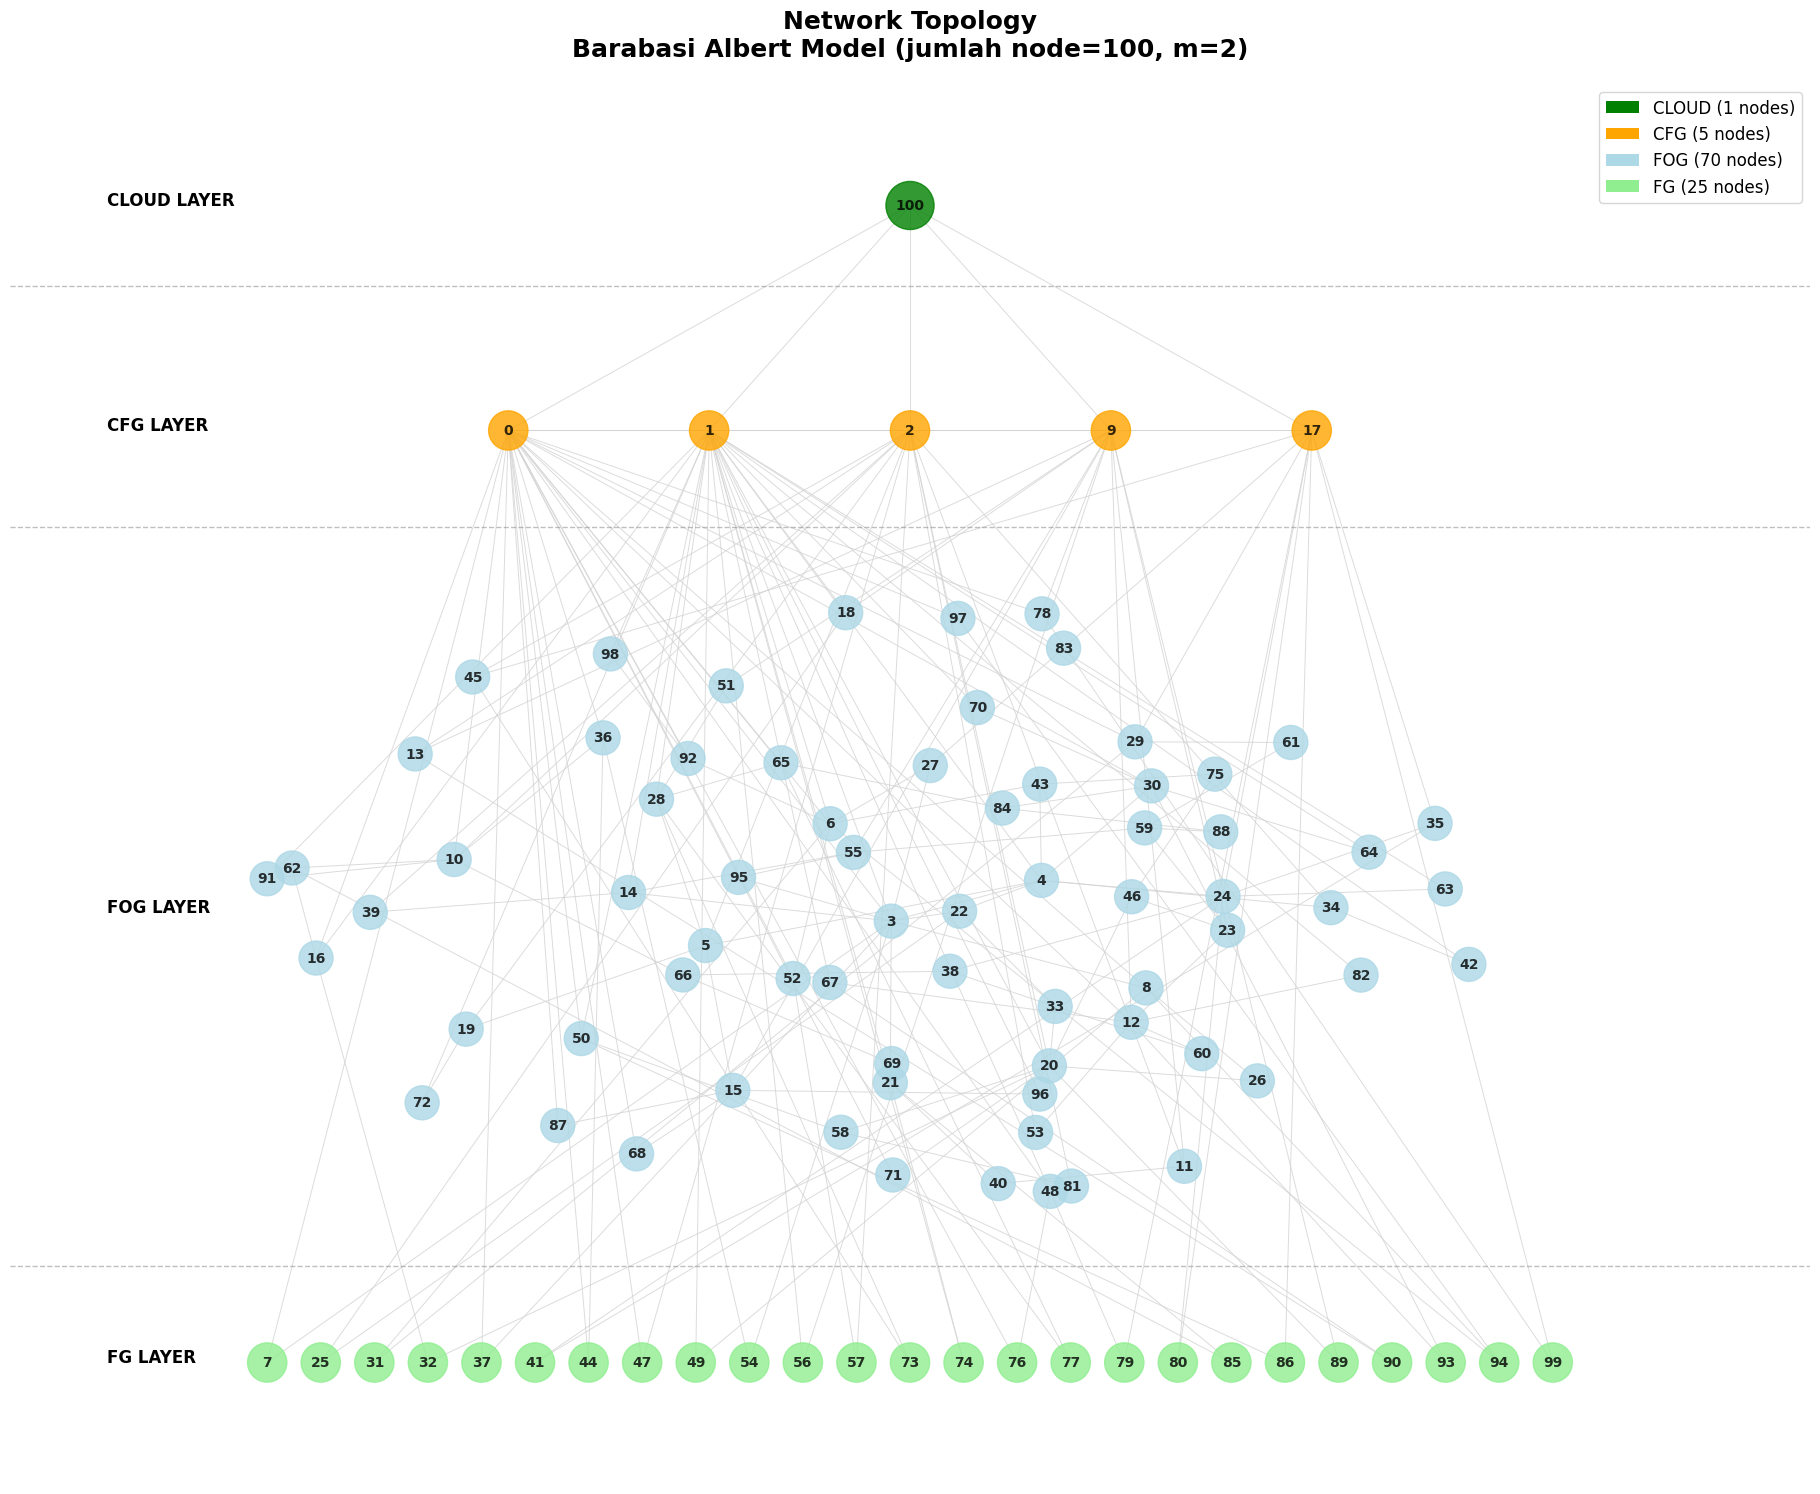


=== CLOUD CONNECTIONS ===
Cloud node 100 terhubung dengan 5 nodes: [0, 1, 2, 9, 17]

=== NODE DISTRIBUTION ===
CLOUD: 1 nodes
CFG: 5 nodes
FOG: 70 nodes
FG: 25 nodes
Total: 101 nodes


In [38]:
# Visualisasi graf NetworkX
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

plt.figure(figsize=(18, 14))

# Definisikan warna untuk setiap tipe node
color_map = {
    'CLOUD': 'green',
    'CFG': 'orange', 
    'FOG': 'lightblue',
    'FG': 'lightgreen'
}

# Kategorisasi node berdasarkan type
cloud_nodes = [node for node in G.nodes() if G.nodes[node].get('type') == 'CLOUD']
cfg_nodes = [node for node in G.nodes() if G.nodes[node].get('type') == 'CFG']
fog_nodes = [node for node in G.nodes() if G.nodes[node].get('type') == 'FOG']
fg_nodes = [node for node in G.nodes() if G.nodes[node].get('type') == 'FG']

print(f"CLOUD: {len(cloud_nodes)}, CFG: {len(cfg_nodes)}, FOG: {len(fog_nodes)}, FG: {len(fg_nodes)}")

# Manual positioning untuk layout berlapis
pos = {}

# Layer 1: CLOUD
y_cloud = 3.0
for i, node in enumerate(cloud_nodes):
    pos[node] = (0, y_cloud)

# Layer 2: CFG (EDIT DISINI - spacing diperkecil dan dicentering)
y_cfg = 2.3
cfg_spacing = 2.5 / max(1, len(cfg_nodes) - 1) if len(cfg_nodes) > 1 else 0  # Diperkecil dari 5.0 ke 2.5
for i, node in enumerate(cfg_nodes):
    x_cfg = -1.25 + i * cfg_spacing if len(cfg_nodes) > 1 else 0  # Range diperkecil dari -3.0 ke -1.25
    pos[node] = (x_cfg, y_cfg)

# Layer 3: FOG
if fog_nodes:
    # Buat subgraph hanya untuk FOG nodes
    fog_subgraph = G.subgraph(fog_nodes)
    # Spring layout khusus untuk FOG dengan area terbatas
    fog_pos = nx.spring_layout(fog_subgraph, k=0.8, iterations=100, seed=42)
    
    # Scale dan shift FOG positions ke area tengah
    y_fog = 0.8
    fog_width = 4.0  # lebar area FOG
    fog_height = 2.0  # tinggi area FOG
    
    for node in fog_nodes:
        # Scale dari [-1,1] ke area yang diinginkan
        x_scaled = fog_pos[node][0] * fog_width/2
        y_scaled = fog_pos[node][1] * fog_height/2 + y_fog
        pos[node] = (x_scaled, y_scaled)

# Layer 4: FG
y_fg = -0.6
fg_spacing = 4.0 / max(1, len(fg_nodes) - 1) if len(fg_nodes) > 1 else 0
for i, node in enumerate(fg_nodes):
    x_fg = -2.0 + i * fg_spacing if len(fg_nodes) > 1 else 0
    pos[node] = (x_fg, y_fg)

# Buat list warna dan ukuran berdasarkan hierarki
node_colors = []
node_sizes = []

for node in G.nodes():
    node_type = G.nodes[node].get('type', 'FOG')
    node_colors.append(color_map.get(node_type, 'gray'))
    
    if node_type == 'CLOUD':
        size = 1200
    elif node_type == 'CFG':
        size = 800
    elif node_type == 'FOG':
        size = 600
    else:  # FG
        size = 800
    node_sizes.append(size)

# Draw graf dengan layout manual
nx.draw(G, pos, 
        node_color=node_colors, 
        node_size=node_sizes,
        with_labels=True, 
        font_size=10,
        font_weight='bold',
        font_color='black',
        edge_color='lightgray',
        width=0.7,
        alpha=0.8)

# Tambahkan garis horizontal untuk memisahkan layer
plt.axhline(y=2.75, color='gray', linestyle='--', alpha=0.5, linewidth=1)
plt.axhline(y=2, color='gray', linestyle='--', alpha=0.5, linewidth=1)
plt.axhline(y=-0.3, color='gray', linestyle='--', alpha=0.5, linewidth=1)

# Tambahkan label layer
plt.text(-2.5, 3.0, 'CLOUD LAYER', fontsize=12, fontweight='bold', ha='left')
plt.text(-2.5, 2.3, 'CFG LAYER', fontsize=12, fontweight='bold', ha='left')
plt.text(-2.5, 0.8, 'FOG LAYER', fontsize=12, fontweight='bold', ha='left')
plt.text(-2.5, -0.6, 'FG LAYER', fontsize=12, fontweight='bold', ha='left')

# Legend diurutkan sesuai hierarki (CLOUD, CFG, FOG, FG)
legend_elements = []
legend_order = ['CLOUD', 'CFG', 'FOG', 'FG']
for node_type in legend_order:
    color = color_map[node_type]
    count = len([n for n in G.nodes() if G.nodes[n].get('type') == node_type])
    legend_elements.append(Patch(facecolor=color, label=f'{node_type} ({count} nodes)'))

plt.legend(handles=legend_elements, loc='upper right', fontsize=12)

plt.title("Network Topology\nBarabasi Albert Model (jumlah node=100, m=2)", 
          fontsize=18, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

print("\n=== CLOUD CONNECTIONS ===")
if cloud_nodes:
    cloud_node = cloud_nodes[0]
    cloud_neighbors = list(G.neighbors(cloud_node))
    print(f"Cloud node {cloud_node} terhubung dengan {len(cloud_neighbors)} nodes: {cloud_neighbors}")

print("\n=== NODE DISTRIBUTION ===")
print(f"CLOUD: {len(cloud_nodes)} nodes")
print(f"CFG: {len(cfg_nodes)} nodes") 
print(f"FOG: {len(fog_nodes)} nodes")
print(f"FG: {len(fg_nodes)} nodes")
print(f"Total: {len(G.nodes())} nodes")

## Application Definition

In [39]:
data_path = 'data/20/'

In [40]:
import json
with open(data_path + 'appDefinition.json', 'r') as file:
    app_definition = json.load(file)

"""
Struktur dari appDefinition.json:
[
list of each application, each with:
    {
        id: int,
        name: string,
        deadline: int,  # deadline aplikasi (ms)
        module: [
            list of module, each with:
            {
                id: int,
                name: string,   # nama tiap module
                RAM: int,       # RAM yang dibutuhkan (MB)
                type: string,   # tipe dari module: MODULE, SOURCE, SINK
            }
        ],
        message: [
            list of message, each with:
            {
                id: int,
                name: string,
                s: string,         # nama module yang jadi sumber
                d: string,         # nama module yang jadi tujuan
                instructions: int  # jumlah instruksi yang diperlukan tiap request
                bytes: int,        # size dari message (bytes)
            }
        ],
        transmission: [
            list of transmission, each with:
            {
                module: string,         # nama module yang memproses
                message_in: string,     # nama message yang masuk
                message_out: string,    # nama message yang keluar
            }
        ]
    }
]
"""

'\nStruktur dari appDefinition.json:\n[\nlist of each application, each with:\n    {\n        id: int,\n        name: string,\n        deadline: int,  # deadline aplikasi (ms)\n        module: [\n            list of module, each with:\n            {\n                id: int,\n                name: string,   # nama tiap module\n                RAM: int,       # RAM yang dibutuhkan (MB)\n                type: string,   # tipe dari module: MODULE, SOURCE, SINK\n            }\n        ],\n        message: [\n            list of message, each with:\n            {\n                id: int,\n                name: string,\n                s: string,         # nama module yang jadi sumber\n                d: string,         # nama module yang jadi tujuan\n                instructions: int  # jumlah instruksi yang diperlukan tiap request\n                bytes: int,        # size dari message (bytes)\n            }\n        ],\n        transmission: [\n            list of transmission, each with

In [41]:
import networkx as nx
import matplotlib.pyplot as plt

# Extract app "0" data
app_0 = app_definition[0]  # First app in the list has id=0
print(f"App {app_0['name']} (ID: {app_0['id']})")
print(f"Deadline: {app_0['deadline']} ms")
print(f"Jumlah modules: {len(app_0['module'])}")
print(f"Jumlah messages: {len(app_0['message'])}")

# Create a directed graph for app "0"
app_graph = nx.DiGraph()

# Tambah nodes (modules) beserta atributnya
for module in app_0['module']:
    module_name = module['name']
    module_ram = module['RAM']
    app_graph.add_node(module_name, RAM=module_ram, type=module['type'])

# Tambah edges (messages) beserta atributnya
for message in app_0['message']:
    source = message['s']
    destination = message['d']
    
    # Kelola jika source-nya "None" (user/workload input)
    if source == "None":
        external_node = "USER_INPUT"
        if not app_graph.has_node(external_node):
            app_graph.add_node(external_node, RAM=0, type="EXTERNAL")
        source = external_node
    
    app_graph.add_edge(
        source, 
        destination,
        name=message['name'],
        instructions=message['instructions'],
        bytes=message['bytes'],
        message_id=message['id']
    )

# Tampilkan atribut dari node
print("\n=== NODE ATTRIBUTES ===")
for node, attrs in app_graph.nodes(data=True):
    print(f"{node}: {attrs}")

# Tampilkan atribut dari edge
print("\n=== EDGE ATTRIBUTES ===")
for source, dest, attrs in app_graph.edges(data=True):
    print(f"{source} -> {dest}: {attrs}")

App 0 (ID: 0)
Deadline: 3719 ms
Jumlah modules: 9
Jumlah messages: 9

=== NODE ATTRIBUTES ===
0_0: {'RAM': 5, 'type': 'MODULE'}
0_1: {'RAM': 3, 'type': 'MODULE'}
0_2: {'RAM': 5, 'type': 'MODULE'}
0_3: {'RAM': 6, 'type': 'MODULE'}
0_4: {'RAM': 1, 'type': 'MODULE'}
0_5: {'RAM': 3, 'type': 'MODULE'}
0_6: {'RAM': 3, 'type': 'MODULE'}
0_7: {'RAM': 5, 'type': 'MODULE'}
0_8: {'RAM': 1, 'type': 'MODULE'}
USER_INPUT: {'RAM': 0, 'type': 'EXTERNAL'}

=== EDGE ATTRIBUTES ===
0_0 -> 0_1: {'name': '0_(0-1)', 'instructions': 58116, 'bytes': 3458260, 'message_id': 1}
0_1 -> 0_2: {'name': '0_(1-2)', 'instructions': 46330, 'bytes': 4127711, 'message_id': 2}
0_1 -> 0_3: {'name': '0_(1-3)', 'instructions': 58099, 'bytes': 3725242, 'message_id': 3}
0_2 -> 0_4: {'name': '0_(2-4)', 'instructions': 33146, 'bytes': 1559581, 'message_id': 4}
0_3 -> 0_6: {'name': '0_(3-6)', 'instructions': 20010, 'bytes': 2040278, 'message_id': 5}
0_3 -> 0_7: {'name': '0_(3-7)', 'instructions': 56628, 'bytes': 1710950, 'message_

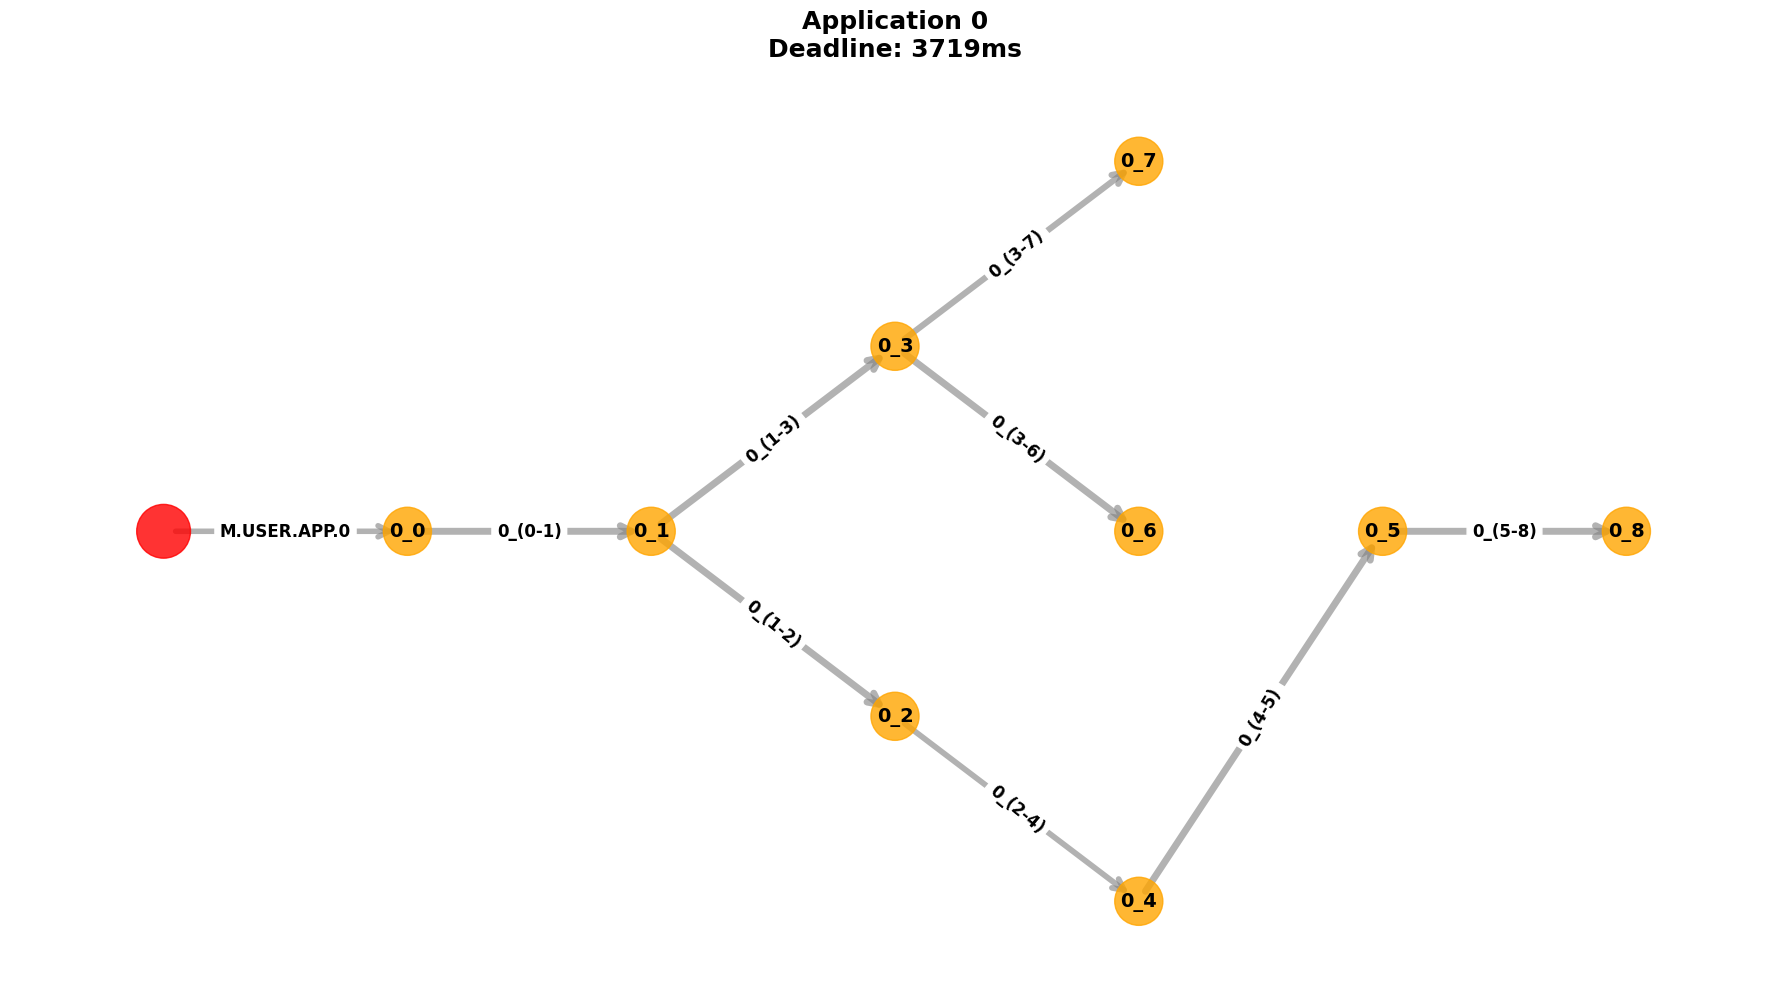

In [42]:
# Visualisasi graf untuk app "0"
plt.figure(figsize=(18, 10))

def create_hierarchical_layout(graph):
    """Create a hierarchical layout showing the directed flow"""
    pos = {}
    layers = {}
    
    external_nodes = [n for n, attr in graph.nodes(data=True) if attr['type'] == 'EXTERNAL']
    if external_nodes:
        layers[0] = external_nodes
        pos[external_nodes[0]] = (0, 0)
    
    entry_points = []
    for node in graph.nodes():
        if graph.in_degree(node) == 1:
            predecessors = list(graph.predecessors(node))
            if predecessors and graph.nodes[predecessors[0]]['type'] == 'EXTERNAL':
                entry_points.append(node)
    
    if entry_points:
        layers[1] = entry_points
        for i, node in enumerate(entry_points):
            pos[node] = (2, i * 0.4)
    
    remaining_nodes = [n for n in graph.nodes() if n not in external_nodes + entry_points]
    
    distance_groups = {}
    for node in remaining_nodes:
        min_dist = float('inf')
        for entry in entry_points:
            if nx.has_path(graph, entry, node):
                dist = nx.shortest_path_length(graph, entry, node)
                min_dist = min(min_dist, dist)
        
        if min_dist == float('inf'):
            min_dist = 0  # Isolated nodes
        
        if min_dist not in distance_groups:
            distance_groups[min_dist] = []
        distance_groups[min_dist].append(node)
    
    # Posisi module
    for dist, nodes in distance_groups.items():
        layer_x = (dist + 1) * 2
        layer_y_start = -(len(nodes) - 1) * 0.5 / 2 
        
        for i, node in enumerate(nodes):
            pos[node] = (layer_x, layer_y_start + i * 0.5)
    
    return pos

pos = create_hierarchical_layout(app_graph)

module_nodes = [node for node, attrs in app_graph.nodes(data=True) if attrs['type'] == 'MODULE']
external_nodes = [node for node, attrs in app_graph.nodes(data=True) if attrs['type'] == 'EXTERNAL']

node_colors = []
node_sizes = []
for node in app_graph.nodes():
    attrs = app_graph.nodes[node]
    if attrs['type'] == 'EXTERNAL':
        node_colors.append('red')
        node_sizes.append(1500)  # Ukuran node user/workload
    else:
        node_colors.append('orange')
        node_sizes.append(1200)  # Ukuran node module

# Draw nodes
nx.draw_networkx_nodes(app_graph, pos, 
                      node_color=node_colors, 
                      node_size=node_sizes,
                      alpha=0.8)

# Draw edges with different widths based on bytes
edge_widths = []
for source, dest, attrs in app_graph.edges(data=True):
    # Normalize bytes to reasonable edge width (1-5)
    normalized_width = 1 + (attrs['bytes'] / 1000000) * 2  # Scale to 1-5 range
    edge_widths.append(min(normalized_width, 5))

nx.draw_networkx_edges(app_graph, pos, 
                      width=edge_widths,
                      edge_color='gray',
                      alpha=0.6,
                      arrows=True,
                      arrowsize=20,
                      arrowstyle='->')

# Draw labels with larger font (exclude USER_INPUT)
labels_to_draw = {node: node for node in app_graph.nodes() if node != 'USER_INPUT'}
nx.draw_networkx_labels(app_graph, pos, labels=labels_to_draw, font_size=14, font_weight='bold', font_color='black')

# Add edge labels with only message names (larger font)
edge_labels = {}
for source, dest, attrs in app_graph.edges(data=True):
    edge_labels[(source, dest)] = attrs['name']

nx.draw_networkx_edge_labels(app_graph, pos, edge_labels, font_size=12, font_weight='bold')

plt.title(f"Application {app_0['name']}\nDeadline: {app_0['deadline']}ms", 
          fontsize=18, fontweight='bold', pad=20)

plt.axis('off')
plt.tight_layout()
plt.show()

In [43]:
# Print summary statistics
print("\n=== APP 0 SUMMARY ===")
print(f"Deadline: {app_0['deadline']} ms")
print(f"Total modules: {len(module_nodes)}")
print(f"Total external inputs: {len(external_nodes)}")
print(f"Total edges (messages): {app_graph.number_of_edges()}")

print("\nRESOURCE REQUIREMENTS:")
# RAM distribution
ram_values = [attrs['RAM'] for node, attrs in app_graph.nodes(data=True) if attrs['type'] == 'MODULE']
print(f"• Total RAM: {sum(ram_values)} MB")
print(f"• RAM range: {min(ram_values)}-{max(ram_values)} MB per module")

# Message size statistics
message_sizes = [attrs['bytes'] for _, _, attrs in app_graph.edges(data=True)]
print(f"• Total message size: {sum(message_sizes)/1000000:.2f} MB")
print(f"• Average message size: {sum(message_sizes)/len(message_sizes)/1000:.2f} KB")

# Instructions statistics
instruction_counts = [attrs['instructions'] for _, _, attrs in app_graph.edges(data=True)]
print(f"• Total instructions: {sum(instruction_counts):,} instructions")
print(f"• Average instructions per message: {sum(instruction_counts)/len(instruction_counts):.0f}")


=== APP 0 SUMMARY ===
Deadline: 3719 ms
Total modules: 9
Total external inputs: 1
Total edges (messages): 9

RESOURCE REQUIREMENTS:
• Total RAM: 32 MB
• RAM range: 1-6 MB per module
• Total message size: 25.17 MB
• Average message size: 2796.55 KB
• Total instructions: 391,914 instructions
• Average instructions per message: 43546


## User/Workload Definition

In [44]:
import json
with open(data_path + 'usersDefinition.json', 'r') as file:
    usersDefinition = json.load(file)

"""
struktur dari usersDefinition.json:
{ 
sources:
    list of user workload, each with:
    {
        app: str, # nama aplikasi
        message: str, # message yang dikirim
        id_resource: int # ID dari device di mana user terhubung
        lambda: int # lambda, request rate (1 request/lamdba ms)
    }
}
"""

# load set of id_resource from usersDefinition
id_resources = set()
for user in usersDefinition['sources']:
    id_resources.add(user['id_resource'])

print(f"Request user berasal dari {len(id_resources)} gateway device, yaitu:")
print(id_resources)

Request user berasal dari 25 gateway device, yaitu:
{7, 25, 31, 32, 37, 41, 44, 47, 49, 54, 56, 57, 73, 74, 76, 77, 79, 80, 85, 86, 89, 90, 93, 94, 99}


## Hasil Service Placement

10 application
```
Number of services in cloud (partition) (servicesInCloud): 71
Number of services in fog (partition) (servicesInFog): 230
1.8001461029052734 time for partition-based optimization

Number of services in cloud (ILP) (servicesInCloud): 71
Number of services in fog (ILP) (servicesInFog): 239
2.6421923637390137 time for ILP-based optimization
```

20 application
```
Number of services in cloud (partition) (servicesInCloud): 128
Number of services in fog (partition) (servicesInFog): 402
3.1582493782043457 time for partition-based optimization

Number of services in cloud (ILP) (servicesInCloud): 128
Number of services in fog (ILP) (servicesInFog): 439
8.202477216720581 time for ILP-based optimization
```

40 application
```
Number of services in cloud (partition) (servicesInCloud): 237
Number of services in fog (partition) (servicesInFog): 493
3.071274995803833 time for partition-based optimization

Number of services in cloud (ILP) (servicesInCloud): 248
Number of services in fog (ILP) (servicesInFog): 536
306.16388416290283 time for ILP-based optimization
```

60 application
```
Number of services in cloud (partition) (servicesInCloud): 385
Number of services in fog (partition) (servicesInFog): 515
5.060806035995483 time for partition-based optimization

Number of services in cloud (ILP) (servicesInCloud): 614
Number of services in fog (ILP) (servicesInFog): 558
12.415808916091919 time for ILP-based optimization
```

80 application
```
Number of services in cloud (partition) (servicesInCloud): 502
Number of services in fog (partition) (servicesInFog): 501
7.7607338428497314 time for partition-based optimization

Number of services in cloud (ILP) (servicesInCloud): 1091
Number of services in fog (ILP) (servicesInFog): 551
24.18412709236145 time for ILP-based optimization
```

In [48]:
import pandas as pd

result_path = "results/20/"

df_result = pd.read_csv(result_path + 'results__1000000.csv')
df_result_link = pd.read_csv(result_path + 'results__1000000_link.csv')

print("Result")
display(df_result)

print("Result link")
display(df_result_link)

Result


Result


,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,1,COMP_M,17,17_107,M.USER.APP.17,57,476,32,100,NaN,5.6780,118.000070,1.236781e+02,108.000000,118.000070
1,2,COMP_M,18,18_117,M.USER.APP.18,61,537,32,100,NaN,5.6221,123.000148,1.286222e+02,110.000000,123.000148
2,1,COMP_M,17,17_108,17_(107-108),476,482,100,100,17_107,4.8109,123.678070,1.284890e+02,123.678070,123.678070
3,1,COMP_M,17,17_109,17_(107-109),476,488,100,100,17_107,2.6802,123.678070,1.263583e+02,123.678070,123.678070
4,1,COMP_M,17,17_110,17_(109-110),488,494,100,100,17_109,2.2590,126.358270,1.286173e+02,126.358270,126.358270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811778,129632,COMP_M,0,0_5,0_(4-5),101,107,100,100,0_4,4.1965,999994.858432,9.999991e+05,999994.858432,999994.858432
811779,129633,COMP_M,18,18_119,18_(118-119),544,551,100,100,18_118,4.6373,999997.634575,1.000002e+06,999997.634575,999997.634575
811780,129633,COMP_M,18,18_120,18_(118-120),544,558,100,100,18_118,5.5201,999997.634575,1.000003e+06,999997.634575,999997.634575
811781,129633,COMP_M,18,18_123,18_(118-123),544,579,100,100,18_118,2.3898,999997.634575,1.000000e+06,999997.634575,999997.634575


Result link


,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,32,16,17,5.000027,M.USER.APP.17,108.000000,2012749,0
1,2,LINK,32,16,18,5.000047,M.USER.APP.18,110.000000,3497329,1
2,1,LINK,16,0,17,4.000027,M.USER.APP.17,113.000027,2012749,1
3,1,LINK,0,100,17,1.000016,M.USER.APP.17,117.000054,2012749,1
4,2,LINK,16,0,18,4.000047,M.USER.APP.18,118.000073,3497329,0
...,...,...,...,...,...,...,...,...,...,...
310489,129633,LINK,56,1,18,4.000047,M.USER.APP.18,999984.000000,3497329,1
310490,129627,LINK,41,24,14,5.000059,14_(93-94),999986.711217,4402161,2
310491,129628,LINK,0,100,13,1.000031,13_(89-90),999987.528971,3884483,2
310492,129633,LINK,1,100,18,1.000028,M.USER.APP.18,999988.000047,3497329,2


## Perhitungan latency

### Jumlah aplikasi 10

#### Partition

In [5]:
import pandas as pd

df_link_10 = pd.read_csv('results/10/results__1000000_link.csv')
display(df_link_10)

average_latency_10 = df_link_10['latency'].mean()
print(f"\nAverage latency: {average_latency_10:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,49,1,0,25.013627,M.USER.APP.0,111.000000,1501022,0
1,2,LINK,25,18,6,60.802000,M.USER.APP.6,125.000000,4335150,1
2,3,LINK,44,36,3,59.780813,M.USER.APP.3,132.000000,4258561,2
3,1,LINK,1,100,0,13.008176,M.USER.APP.0,136.013627,1501022,2
4,5,LINK,47,0,9,31.050547,M.USER.APP.9,144.000000,1953791,3
...,...,...,...,...,...,...,...,...,...,...
238697,63996,LINK,0,100,6,17.627344,6_(45-46),999988.739842,2078418,15
238698,64005,LINK,18,1,0,25.013627,M.USER.APP.0,999989.013627,1501022,15
238699,64000,LINK,28,1,6,47.376507,6_(45-47),999990.781237,3253238,15
238700,63998,LINK,28,1,0,59.036147,0_(1-2),999994.751289,4127711,14



Average latency: 34.903768 ms


#### ILP

In [6]:
import pandas as pd

df_link_ilp_10 = pd.read_csv('results/10/results_ILP_1000000_link.csv')
display(df_link_ilp_10)

average_latency_ilp_10 = df_link_ilp_10['latency'].mean()
print(f"\nAverage latency: {average_latency_ilp_10:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,49,1,0,25.013627,M.USER.APP.0,111.000000,1501022,0
1,3,LINK,44,0,3,59.780813,M.USER.APP.3,132.000000,4258561,1
2,1,LINK,1,100,0,13.008176,M.USER.APP.0,136.013627,1501022,1
3,4,LINK,77,28,6,62.802000,M.USER.APP.6,143.000000,4335150,2
4,5,LINK,47,0,9,31.050547,M.USER.APP.9,144.000000,1953791,3
...,...,...,...,...,...,...,...,...,...,...
301177,64005,LINK,25,18,0,23.013627,M.USER.APP.0,999966.000000,1501022,31642
301178,64003,LINK,17,100,4,15.328016,M.USER.APP.4,999971.880027,1791002,31642
301179,63997,LINK,67,1,1,52.460720,1_(9-10),999987.926686,3559554,31640
301180,41480,LINK,1,100,3,24.640400,3_(24-26),999989.071372,2955050,31640



Average latency: 35.230801 ms


### Jumlah aplikasi 20

#### Partition

In [7]:
import pandas as pd

df_link_20 = pd.read_csv('results/20/results__1000000_link.csv')
display(df_link_20)

average_latency_20 = df_link_20['latency'].mean()
print(f"\nAverage latency: {average_latency_20:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,32,16,17,31.836653,M.USER.APP.17,108.000000,2012749,0
1,2,LINK,32,16,18,51.631053,M.USER.APP.18,110.000000,3497329,1
2,1,LINK,16,0,17,30.836653,M.USER.APP.17,139.836653,2012749,1
3,3,LINK,57,2,13,52.952240,M.USER.APP.13,144.000000,3596418,2
4,4,LINK,90,13,13,50.952240,M.USER.APP.13,157.000000,3596418,3
...,...,...,...,...,...,...,...,...,...,...
310480,129633,LINK,56,1,18,50.631053,M.USER.APP.18,999984.000000,3497329,11399
310481,129627,LINK,41,24,14,63.695480,14_(93-94),999986.711217,4402161,11399
310482,129624,LINK,1,100,5,16.530840,M.USER.APP.5,999987.143400,1941355,11399
310483,129634,LINK,32,16,18,51.631053,M.USER.APP.18,999997.000000,3497329,11398



Average latency: 35.254395 ms


#### ILP

In [8]:
import pandas as pd

df_link_ilp_20 = pd.read_csv('results/20/results_ILP_1000000_link.csv')
display(df_link_ilp_20)

average_latency_ilp_20 = df_link_ilp_20['latency'].mean()
print(f"\nAverage latency: {average_latency_ilp_20:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,32,16,17,31.836653,M.USER.APP.17,108.000000,2012749,0
1,2,LINK,32,16,18,51.631053,M.USER.APP.18,110.000000,3497329,1
2,1,LINK,16,0,17,30.836653,M.USER.APP.17,139.836653,2012749,1
3,3,LINK,57,2,13,52.952240,M.USER.APP.13,144.000000,3596418,2
4,4,LINK,90,67,13,51.952240,M.USER.APP.13,157.000000,3596418,3
...,...,...,...,...,...,...,...,...,...,...
340015,129633,LINK,56,1,18,50.631053,M.USER.APP.18,999984.000000,3497329,11212
340016,129627,LINK,41,24,14,32.378720,14_(93-95),999986.711217,2053404,11213
340017,129579,LINK,17,100,18,28.978632,M.USER.APP.18,999994.605107,3497329,11212
340018,129634,LINK,32,16,18,51.631053,M.USER.APP.18,999997.000000,3497329,11213



Average latency: 34.254312 ms


### Jumlah aplikasi 40

#### Partition

In [9]:
import pandas as pd

df_link_40 = pd.read_csv('results/40/results__1000000_link.csv')
display(df_link_40)

average_latency_40 = df_link_40['latency'].mean()
print(f"\nAverage latency: {average_latency_40:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,31,6,5,30.884733,M.USER.APP.5,108.000000,1941355,0
1,2,LINK,86,17,18,49.631053,M.USER.APP.18,109.000000,3497329,1
2,3,LINK,32,16,6,62.802000,M.USER.APP.6,110.000000,4335150,2
3,4,LINK,93,12,28,62.298973,M.USER.APP.28,111.000000,4447423,3
4,5,LINK,86,17,33,40.408413,M.USER.APP.33,111.000000,2805631,4
...,...,...,...,...,...,...,...,...,...,...
600088,239754,LINK,6,0,14,37.226453,M.USER.APP.14,999987.005720,2416984,103628
600089,239690,LINK,0,100,29,13.600120,29_(174-175),999989.619889,1575015,103628
600090,239747,LINK,9,100,34,28.534656,M.USER.APP.34,999991.782187,3441832,103628
600091,239761,LINK,21,1,38,23.068027,M.USER.APP.38,999994.068027,1505102,103626



Average latency: 36.411761 ms


#### ILP

In [10]:
import pandas as pd

df_link_ilp_40 = pd.read_csv('results/40/results_ILP_1000000_link.csv')
display(df_link_ilp_40)

average_latency_ilp_40 = df_link_ilp_40['latency'].mean()
print(f"\nAverage latency: {average_latency_ilp_40:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,31,6,5,30.884733,M.USER.APP.5,108.000000,1941355,0
1,2,LINK,86,17,18,49.631053,M.USER.APP.18,109.000000,3497329,1
2,3,LINK,32,16,6,62.802000,M.USER.APP.6,110.000000,4335150,2
3,4,LINK,93,12,28,62.298973,M.USER.APP.28,111.000000,4447423,3
4,5,LINK,86,17,33,40.408413,M.USER.APP.33,111.000000,2805631,4
...,...,...,...,...,...,...,...,...,...,...
704150,228385,LINK,18,1,3,44.400667,3_(24-26),999993.073523,2955050,132890
704151,239705,LINK,2,100,9,16.630328,M.USER.APP.9,999993.281053,1953791,132890
704152,239761,LINK,21,1,38,23.068027,M.USER.APP.38,999994.068027,1505102,132890
704153,239767,LINK,32,16,6,62.802000,M.USER.APP.6,999997.000000,4335150,132890



Average latency: 35.894952 ms


### Jumlah aplikasi 60

#### Partition

In [11]:
import pandas as pd

df_link_60 = pd.read_csv('results/60/results__1000000_link.csv')
display(df_link_60)

average_latency_60 = df_link_60['latency'].mean()
print(f"\nAverage latency: {average_latency_60:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,76,0,56,42.177000,M.USER.APP.56,109.000000,2938275,0
1,2,LINK,93,12,12,51.629333,M.USER.APP.12,111.000000,3647200,1
2,3,LINK,86,17,17,29.836653,M.USER.APP.17,111.000000,2012749,2
3,4,LINK,57,2,40,36.703320,M.USER.APP.40,113.000000,2377749,3
4,5,LINK,56,1,51,28.210720,M.USER.APP.51,118.000000,1815804,4
...,...,...,...,...,...,...,...,...,...,...
881315,360833,LINK,57,2,38,25.068027,M.USER.APP.38,999994.000000,1505102,188414
881316,360804,LINK,0,100,24,32.344040,M.USER.APP.24,999994.131160,3918005,188414
881317,360834,LINK,99,17,0,24.013627,M.USER.APP.0,999995.000000,1501022,188413
881318,360814,LINK,17,100,58,27.469584,M.USER.APP.58,999997.115973,3308698,188413



Average latency: 34.812482 ms


#### ILP

In [12]:
import pandas as pd

df_link_ilp_60 = pd.read_csv('results/60/results_ILP_1000000_link.csv')
display(df_link_ilp_60)

average_latency_ilp_60 = df_link_ilp_60['latency'].mean()
print(f"\nAverage latency: {average_latency_ilp_60:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,76,0,56,42.177000,M.USER.APP.56,109.000000,2938275,0
1,2,LINK,93,12,12,51.629333,M.USER.APP.12,111.000000,3647200,1
2,3,LINK,86,17,17,29.836653,M.USER.APP.17,111.000000,2012749,2
3,4,LINK,57,2,40,36.703320,M.USER.APP.40,113.000000,2377749,3
4,5,LINK,56,1,51,28.210720,M.USER.APP.51,118.000000,1815804,4
...,...,...,...,...,...,...,...,...,...,...
906303,360832,LINK,93,12,27,38.659533,M.USER.APP.27,999994.000000,2674465,199815
906304,360833,LINK,57,2,38,25.068027,M.USER.APP.38,999994.000000,1505102,199816
906305,360804,LINK,0,100,24,32.344040,M.USER.APP.24,999994.131160,3918005,199816
906306,360834,LINK,99,17,0,24.013627,M.USER.APP.0,999995.000000,1501022,199816



Average latency: 34.670767 ms


### Jumlah aplikasi 80

#### Partition

In [13]:
import pandas as pd

df_link_80 = pd.read_csv('results/80/results__1000000_link.csv')
display(df_link_80)

average_latency_80 = df_link_80['latency'].mean()
print(f"\nAverage latency: {average_latency_80:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,76,0,43,26.167173,M.USER.APP.43,109.000000,1737538,0
1,2,LINK,57,2,27,40.659533,M.USER.APP.27,113.000000,2674465,1
2,3,LINK,76,0,65,56.058107,M.USER.APP.65,113.000000,3979358,2
3,4,LINK,56,1,38,24.068027,M.USER.APP.38,118.000000,1505102,3
4,6,LINK,86,17,13,50.952240,M.USER.APP.13,121.000000,3596418,4
...,...,...,...,...,...,...,...,...,...,...
1153708,471267,LINK,28,1,71,31.289013,M.USER.APP.71,999998.182733,2046676,318913
1153709,491583,LINK,0,100,19,16.348744,M.USER.APP.19,999999.185893,1918593,318913
1153710,491524,LINK,65,0,53,64.321613,53_(336-337),999999.428304,4449121,318914
1153711,491524,LINK,65,0,53,57.937533,53_(336-343),999999.428304,3970315,318915



Average latency: 36.725999 ms


#### ILP

In [14]:
import pandas as pd

df_link_ilp_80 = pd.read_csv('results/80/results_ILP_1000000_link.csv')
display(df_link_ilp_80)

average_latency_ilp_80 = df_link_ilp_80['latency'].mean()
print(f"\nAverage latency: {average_latency_ilp_80:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,76,0,43,26.167173,M.USER.APP.43,109.000000,1737538,0
1,2,LINK,57,2,27,40.659533,M.USER.APP.27,113.000000,2674465,1
2,3,LINK,76,0,65,56.058107,M.USER.APP.65,113.000000,3979358,2
3,4,LINK,56,1,38,24.068027,M.USER.APP.38,118.000000,1505102,3
4,5,LINK,73,28,61,41.014240,M.USER.APP.61,119.000000,2701068,4
...,...,...,...,...,...,...,...,...,...,...
359984,152724,LINK,73,28,35,39.076053,35_(203-210),313298.488565,2555704,98446
359985,152768,LINK,57,2,12,53.629333,M.USER.APP.12,313299.000000,3647200,98447
359986,152515,LINK,17,100,69,22.779000,M.USER.APP.69,313299.248560,2722375,98447
359987,152679,LINK,21,1,44,45.863573,M.USER.APP.44,313300.250267,3214768,98447



Average latency: 36.288590 ms


### Plot Perhitungan Latency

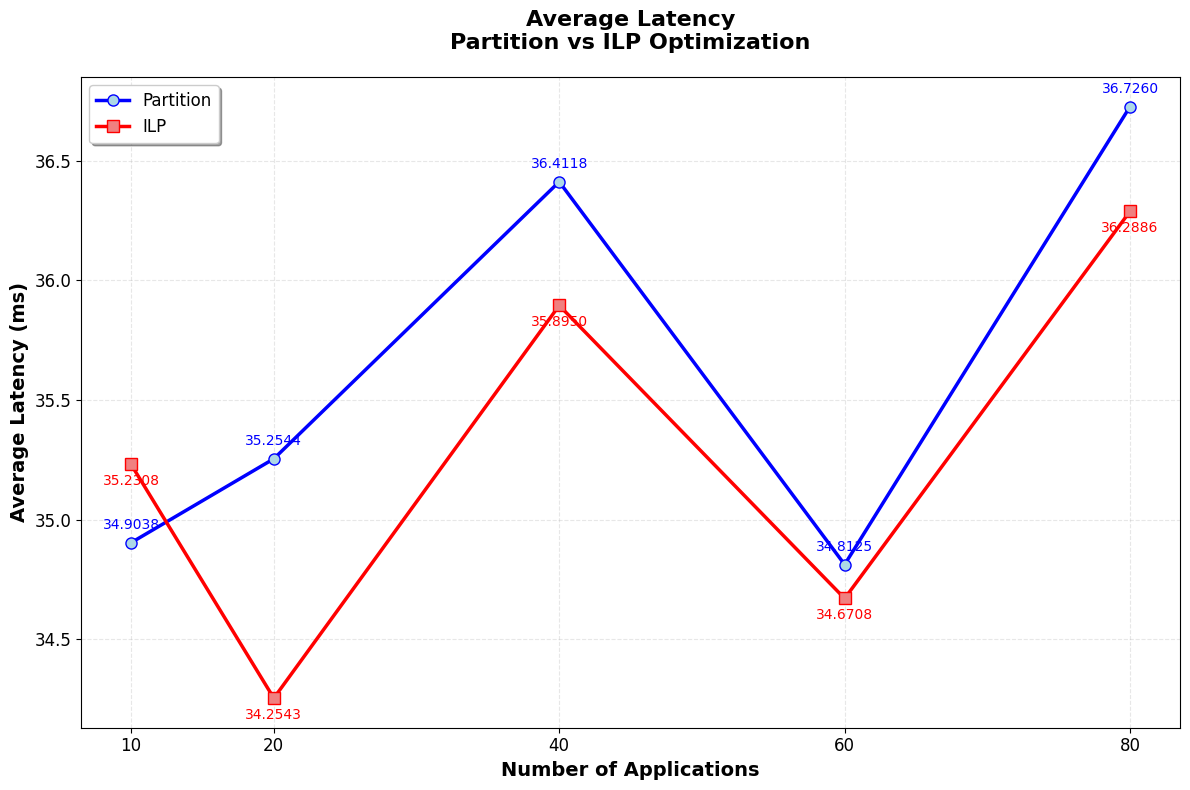

=== LATENCY COMPARISON SUMMARY ===

Partition-based Optimization:
  10 apps: 34.903768 ms
  20 apps: 35.254395 ms
  40 apps: 36.411761 ms
  60 apps: 34.812482 ms
  80 apps: 36.725999 ms

ILP-based Optimization:
  10 apps: 35.230801 ms
  20 apps: 34.254312 ms
  40 apps: 35.894952 ms
  60 apps: 34.670767 ms
  80 apps: 36.288590 ms


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
num_applications = [10, 20, 40, 60, 80]

# Partition method latencies
partition_latencies = [
    average_latency_10,
    average_latency_20, 
    average_latency_40,
    average_latency_60,
    average_latency_80
]

# ILP method latencies
ilp_latencies = [
    average_latency_ilp_10,
    average_latency_ilp_20,
    average_latency_ilp_40,
    average_latency_ilp_60,
    average_latency_ilp_80
]

# Create the plot
plt.figure(figsize=(12, 8))

# Plot lines with different colors and markers
plt.plot(num_applications, partition_latencies, 
         color='blue', marker='o', linewidth=2.5, markersize=8,
         label='Partition', markerfacecolor='lightblue')

plt.plot(num_applications, ilp_latencies, 
         color='red', marker='s', linewidth=2.5, markersize=8,
         label='ILP', markerfacecolor='lightcoral')

# Customize the plot
plt.xlabel('Number of Applications', fontsize=14, fontweight='bold')
plt.ylabel('Average Latency (ms)', fontsize=14, fontweight='bold')
plt.title('Average Latency\nPartition vs ILP Optimization', 
          fontsize=16, fontweight='bold', pad=20)

# Add grid for better readability
plt.grid(True, alpha=0.3, linestyle='--')

# Customize legend
plt.legend(fontsize=12, loc='upper left', frameon=True, fancybox=True, shadow=True)

# Set x-axis ticks
plt.xticks(num_applications, fontsize=12)
plt.yticks(fontsize=12)

# Add value annotations on each point
for i, (x, y1, y2) in enumerate(zip(num_applications, partition_latencies, ilp_latencies)):
    plt.annotate(f'{y1:.4f}', (x, y1), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=10, color='blue')
    plt.annotate(f'{y2:.4f}', (x, y2), textcoords="offset points", 
                xytext=(0,-15), ha='center', fontsize=10, color='red')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

# Print summary statistics
print("=== LATENCY COMPARISON SUMMARY ===")
print("\nPartition-based Optimization:")
for i, (apps, latency) in enumerate(zip(num_applications, partition_latencies)):
    print(f"  {apps} apps: {latency:.6f} ms")

print("\nILP-based Optimization:")
for i, (apps, latency) in enumerate(zip(num_applications, ilp_latencies)):
    print(f"  {apps} apps: {latency:.6f} ms")

## Meet Deadline

### Jumlah aplikasi 10

In [ ]:
import pandas as pd
import json

df_deadline_10 = pd.read_csv('results/10/results__1000000.csv')

with open('data/10/appDefinition.json', 'r') as f:
    app_data = json.load(f)

for app in app_data:
    print(f"App name: {app['name']}, Deadline: {app['deadline']}")

# add new column 'time_response' with calculating column 'time_out' - 'time_emit'
df_deadline_10['time_response'] = df_deadline_10['time_out'] - df_deadline_10['time_emit']
display(df_deadline_10)

App name: 0, Deadline: 5113
App name: 1, Deadline: 4512
App name: 2, Deadline: 4889
App name: 3, Deadline: 3412
App name: 4, Deadline: 3536
App name: 5, Deadline: 4020
App name: 6, Deadline: 5469
App name: 7, Deadline: 3387
App name: 8, Deadline: 3709
App name: 9, Deadline: 3933


,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception,time_response
0,2,COMP_M,1,1_7,M.USER.APP.1,5,76,94,6,NaN,53.809524,116.000055,1.698096e+02,111.000000,116.000055,58.809579
1,1,COMP_M,1,1_7,M.USER.APP.1,2,78,54,100,NaN,4.633000,119.000143,1.236331e+02,108.000000,119.000143,15.633143
2,1,COMP_M,1,1_8,1_(7-8),78,81,100,100,1_7,5.809900,123.633143,1.294430e+02,123.633143,123.633143,5.809900
3,3,COMP_M,4,4_22,M.USER.APP.4,12,168,77,100,NaN,5.700200,128.000066,1.337003e+02,117.000000,128.000066,16.700266
4,4,COMP_M,9,9_55,M.USER.APP.9,35,370,93,100,NaN,4.749800,132.000097,1.367499e+02,121.000000,132.000097,15.749897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437253,71915,COMP_M,8,8_48,8_(47-48),333,338,100,100,8_47,4.880900,999995.921625,1.000001e+06,999995.921625,999995.921625,4.880900
437254,71915,COMP_M,8,8_50,8_(47-50),333,348,100,100,8_47,2.317700,999995.921625,9.999982e+05,999995.921625,999995.921625,2.317700
437255,71915,COMP_M,8,8_51,8_(47-51),333,353,100,100,8_47,4.842700,999995.921625,1.000001e+06,999995.921625,999995.921625,4.842700
437256,71915,COMP_M,8,8_53,8_(47-53),333,363,100,100,8_47,3.722100,999995.921625,9.999996e+05,999995.921625,999995.921625,3.722100


In [ ]:
# sum 'time_response' group by 'id' and 'app'
df_response_time = df_deadline_10.groupby(['id', 'app'])['time_response'].sum().reset_index()
df_response_time.rename(columns={'time_response': 'total_response_time'}, inplace=True)

df_response_time['meet_deadline'] = df_response_time.apply(
    lambda row: 'Yes' if row['total_response_time'] < app_data[int(row['app'])]['deadline'] else 'No', axis=1
)

display(df_response_time)

,id,app,total_response_time,meet_deadline
0,1,1,21.443043,Yes
1,2,1,126.288092,Yes
2,3,4,52.086266,Yes
3,4,9,39.756597,Yes
4,5,1,16.442988,Yes
...,...,...,...,...
71911,71912,4,47.086241,Yes
71912,71913,4,52.086266,Yes
71913,71914,1,16.442988,Yes
71914,71915,8,46.746125,Yes
